<a href="https://colab.research.google.com/github/bdrinconp/ml_stats_classes/blob/main/code_samples/clase5_completo_arboles_decision_regresion_vf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos predictivos

##¿Qué es un modelo?

**Modelo:** Representación simplificada de un sistema del mundo real, diseñada para simular ciertos aspectos o comportamientos de este.

##¿Qué es un modelo predictivo?

**Modelo predictivo:** Es un tipo de modelo matemático o computacional utilizado para predecir un resultado futuro en función de variables de entrada.

1. Estos modelos se entrenan utilizando un conjunto de datos históricos.  
2. Una vez validados, se pueden aplicar a nuevos datos para hacer predicciones.

## ¿ Qué es un modelo de regresión?

**Modelo de regresión:** Es un tipo específico de modelo de aprendizaje automático que busca entender y describir la relación entre una variable dependiente y una o más variables independientes.  

El objetivo es modelar esta relación de manera que se pueda predecir la variable dependiente en función de nuevas observaciones de las variables independientes.

## ¿ Qué es la variable dependiente y las variables independientes?

**Variable dependiente:** Es aquella que se busca predecir en un modelo predictivo. Es la variable “objetivo” o “resultado” que se supone es influenciada o determinada por una o más variables independientes.   

**Variables independientes:** Son las variables que se utilizan para explicar, predecir o influir en la variable dependiente. Estas son las variables “explicativas” o “predictoras” en el modelo.

# Introducción a regresión lineal

1. Generar una linea de datos que *mejor* se ajusta a los datos originales.
2. Forma parte del analisis supervisado.
3. $W_0$ es el intercepto y $W_1$ es la pendiente.

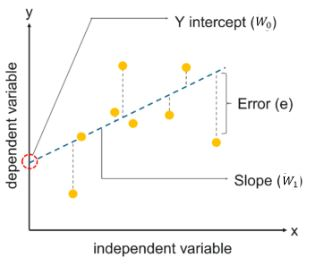

En este notebook aprenderemos qué es una regresión lineal y cómo funciona con un ejemplo en Python. Para esto lo primero que tendremos que hacer es cargar las librerias, descargar los datos y entender qué contienen.

## Importando Librerias

[seaborn](https://seaborn.pydata.org/)  
[matplotlib](https://matplotlib.org/)  
[pandas](https://pandas.pydata.org/)  
[numpy](https://numpy.org/)   
[sklearn](https://scikit-learn.org/stable/) ⚡



In [ ]:
# Librerias
# ==============================================================================
# Manipulación de datos
import pandas as pd
import numpy as np
# Visualización
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Importando datos

El conjunto de datos Boston Housing contiene información sobre 506 vecindarios de Boston recogida en el censo de 1970.

**Variable objetivo:**

* medv: Es el valor mediano del precio de las viviendas en miles de dólares. Esta es la variable que queremos predecir o entender en base a las demás variables.

**Variables predictoras o independientes:**

* crim: Representa la tasa de crímenes per cápita en cada ciudad. Cuanto mayor sea el número, más crímenes se reportan por cada habitante.

* zn: Muestra la proporción de terrenos grandes, específicamente aquellos que tienen más de 25,000 pies cuadrados, destinados para uso residencial.

* indus: Indica la proporción del área de la ciudad que está asignada para negocios que no son de venta al por menor.

* chas: Es un indicador binario que señala si una propiedad está cerca del río Charles (1 si está cerca y 0 si no).

* nox: Medida de la contaminación del aire, representada por la concentración de óxidos nítricos en partes por 10 millones.

* rm: Significa el número promedio de habitaciones que puedes esperar encontrar en una casa en esa área.

* age: Representa la proporción de casas que fueron construidas antes de 1940 y que aún son ocupadas por sus dueños.

* dis: Muestra la distancia media ponderada a los cinco principales centros de empleo en Boston.

* rad: Es un índice que indica lo fácil que es acceder a autopistas desde cada área.

* tax: Indica la cantidad de impuestos sobre la propiedad que se deben pagar por cada $10,000 del valor de la propiedad.

* ptratio: Representa el número de estudiantes por cada maestro en las escuelas de la localidad.

* b: Es un indicador del nivel de diversidad racial en el área, centrado en la proporción de residentes negros.

* lstat: Representa el porcentaje de la población considerada de "bajos ingresos" o "estatus socioeconómico bajo".

Estas variables nos ofrecen una imagen completa de diversas facetas de la vida en diferentes vecindarios de Boston, y son útiles para entender el valor mediano de las casas en cada área.

In [ ]:
# importamos los datos desde la url
# ==============================================================================
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# estructura del dataframe
# ==============================================================================
df.shape

(506, 14)

In [ ]:
# revisión de datos faltantes
# ==============================================================================
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [ ]:
# información del dataframe
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Entendiendo y explorando los datos
Una vez descargados los datos lo que hay que hacer es entenderlos. Es importante saber que el algoritmo de regresión lineal se basa altamente en correlaciones por lo que yo recomiendo que empecemos viendo un gráfico de correlaciones usando pairplot de Seaborn.

In [ ]:
# entiendimiento: 1. metricas descriptivas
# ==============================================================================
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


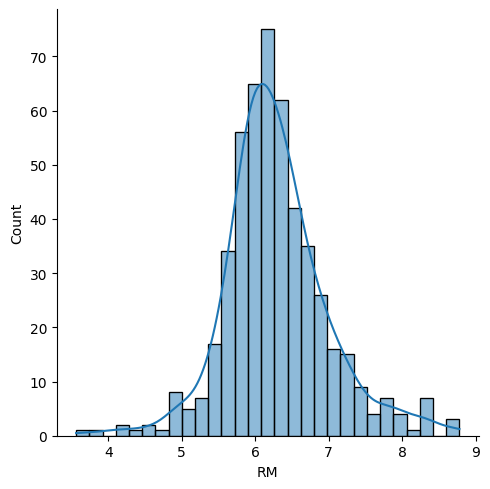

In [ ]:
# hagamos un histograma del numero de habitaciones
# ==============================================================================
sns.displot(data = df, x= 'RM', kde = True) #kind = 'kde', 'ecdf'

<Axes: xlabel='RM'>

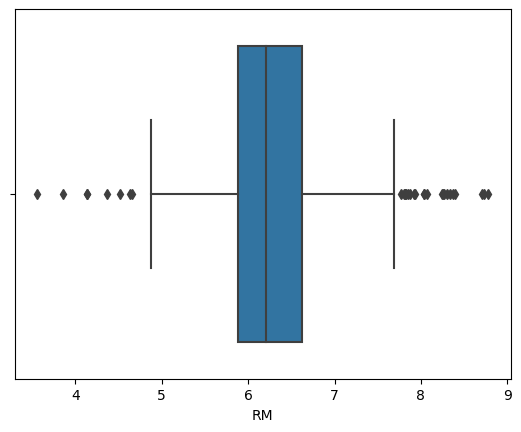

In [ ]:
# hagamos un boxplot del numero de habitaciones
# ==============================================================================
sns.boxplot(data = df, x= 'RM')

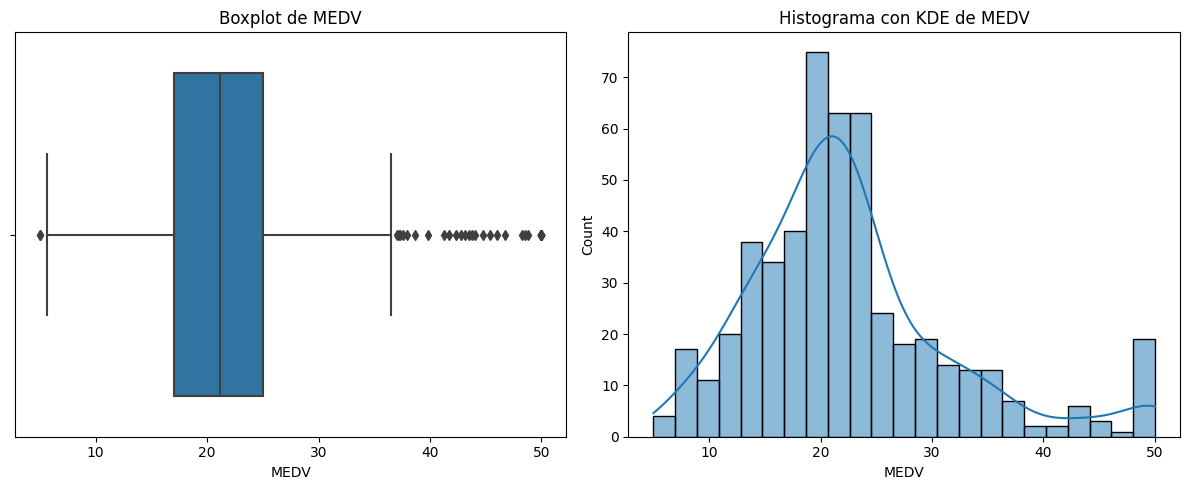

In [ ]:
# hagamos en un mismo grafico el histograma y el boxplot de los precios
# ==============================================================================
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) # la función subplot nos ayuda a hacer un grafico que incorpora otros graficos
# Primer subgráfico: Boxplot
sns.boxplot(data=df, x='MEDV', ax=ax[0])
ax[0].set_title('Boxplot de MEDV') #esto configura un titulo al grafico

# Segundo subgráfico: Histograma con KDE
sns.histplot(data=df, x='MEDV', kde=True, ax=ax[1])
ax[1].set_title('Histograma con KDE de MEDV') #esto configura un titulo al grafico

plt.tight_layout()
plt.show()


In [ ]:
# Obtengamos algunas medidas descriptivas interesantes de los precios
# ==============================================================================

# Medidas de centralidad
print(f"El promedio de los precios de las viviendas era de: ${df['MEDV'].mean()}")
print(f"La mediana de los precios de las viviendas era de: ${df['MEDV'].median()}")
print(f"La moda de los precios de las viviendas era de: ${df['MEDV'].mode()[0]}")
print("=======================================================================================")

# Medidas de dispersión
print(f"La varianza de los precios de las viviendas era de: ${df['MEDV'].var()}")
print(f"La desviación estándar de los precios de las viviendas era de: ${df['MEDV'].std()}")
print(f"El rango de los precios de las viviendas era de: ${df['MEDV'].max() -df['MEDV'].min()}")
print("=======================================================================================")

# Medidas de posición
print(f"El minimo de los precios de las viviendas era de: ${df['MEDV'].min()}")
print(f"El maximo de los precios de las viviendas era de: ${df['MEDV'].max()}")
print(f"El rango percentil 25 (cuartil 1) de los precios de las viviendas era de: ${df['MEDV'].quantile(0.25)}")
print(f"El rango percentil 75 (cuartil 3) de los precios de las viviendas era de: ${df['MEDV'].quantile(0.75)}")
print(f"El rango intercuartilico de los precios de las viviendas era de: ${df['MEDV'].quantile(0.75)-df['MEDV'].quantile(0.25)}")
#-----
p = 0.90  # Reemplaza este valor con el percentil que te interese.
percentil_p = df['MEDV'].quantile(p)
print(f"El percentil {p*100} de los precios de las viviendas es: ${percentil_p}")
#-----


El promedio de los precios de las viviendas era de: $22.532806324110677
La mediana de los precios de las viviendas era de: $21.2
La moda de los precios de las viviendas era de: $50.0
La varianza de los precios de las viviendas era de: $84.58672359409856
La desviación estándar de los precios de las viviendas era de: $9.197104087379818
El rango de los precios de las viviendas era de: $45.0
El minimo de los precios de las viviendas era de: $5.0
El maximo de los precios de las viviendas era de: $50.0
El rango percentil 25 (cuartil 1) de los precios de las viviendas era de: $17.025
El rango percentil 75 (cuartil 3) de los precios de las viviendas era de: $25.0
El rango intercuartilico de los precios de las viviendas era de: $7.975000000000001
El percentil 90.0 de los precios de las viviendas es: $34.8


<Axes: xlabel='RM', ylabel='MEDV'>

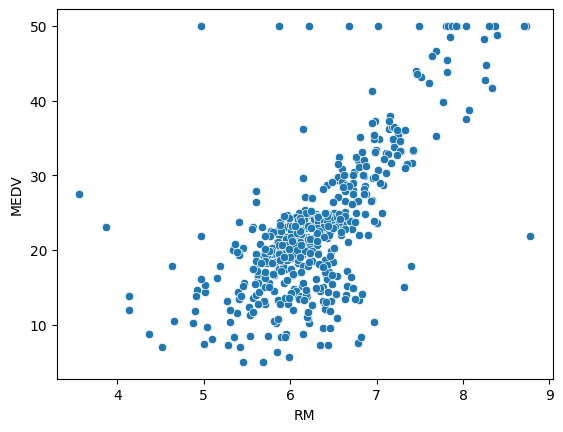

In [ ]:
# Hagamos un grafico de dispersión para las habitaciones y el precio
# ==============================================================================
sns.scatterplot(df, x = 'RM', y = 'MEDV')

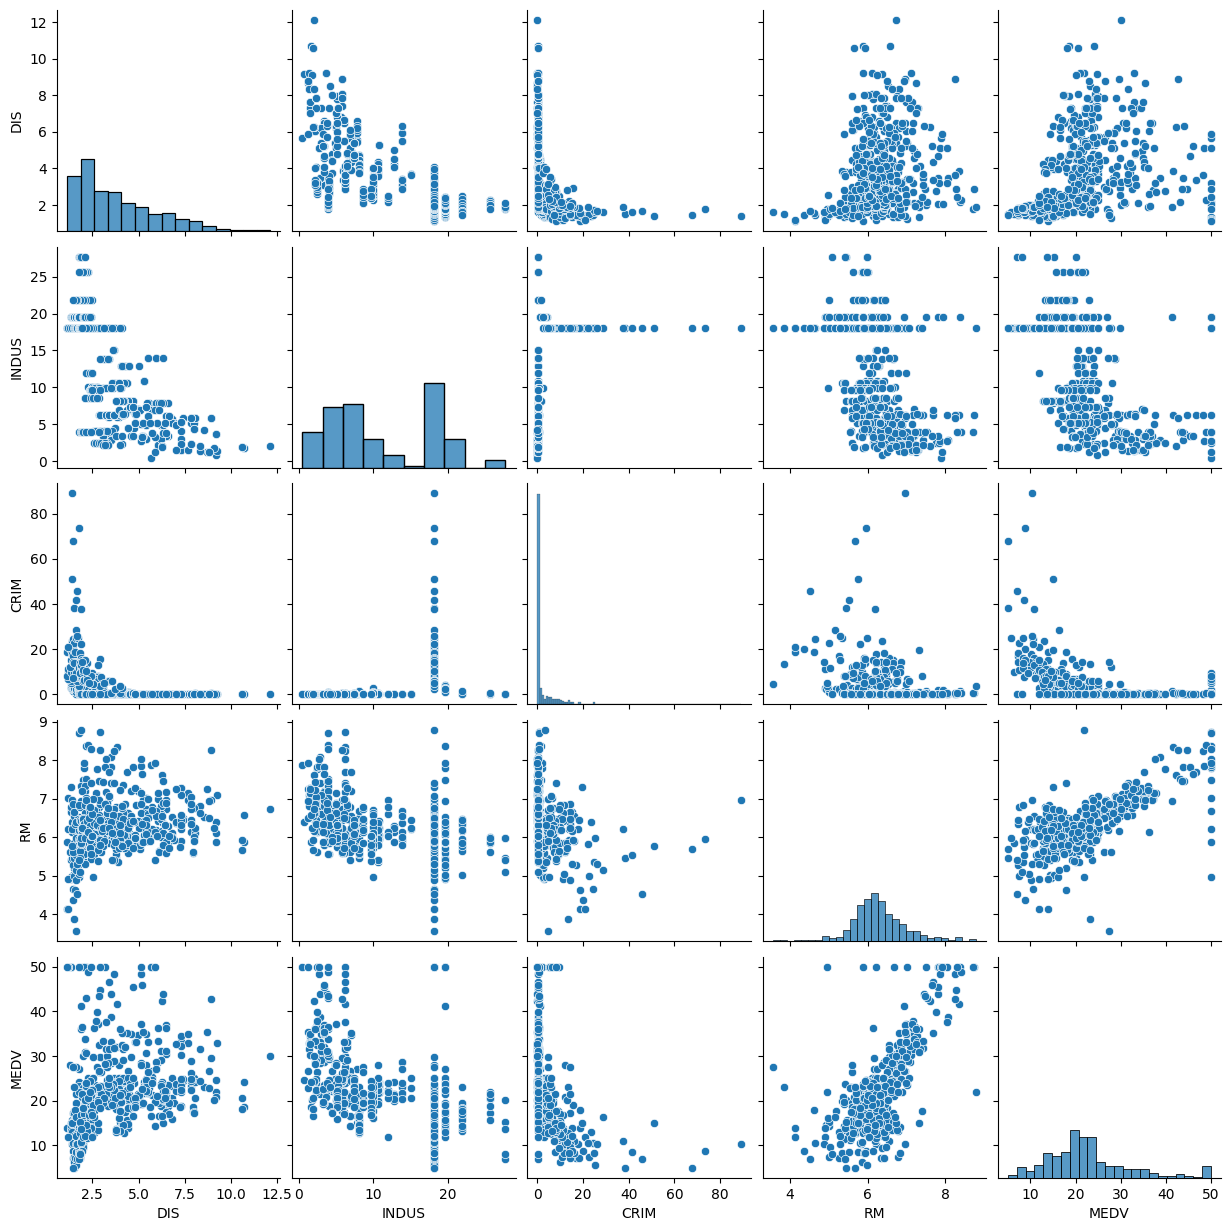

In [ ]:
# entiendimiento: 2. visualización por pares
# ==============================================================================
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV'] # Seleccionamos las columnas para las cuales vamos a hacer el plot
sns.pairplot(df[cols]) # Mostramos el grafico

In [ ]:
# entiendimiento: 3. correlación ¿Dificil de comprender?
# ==============================================================================
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


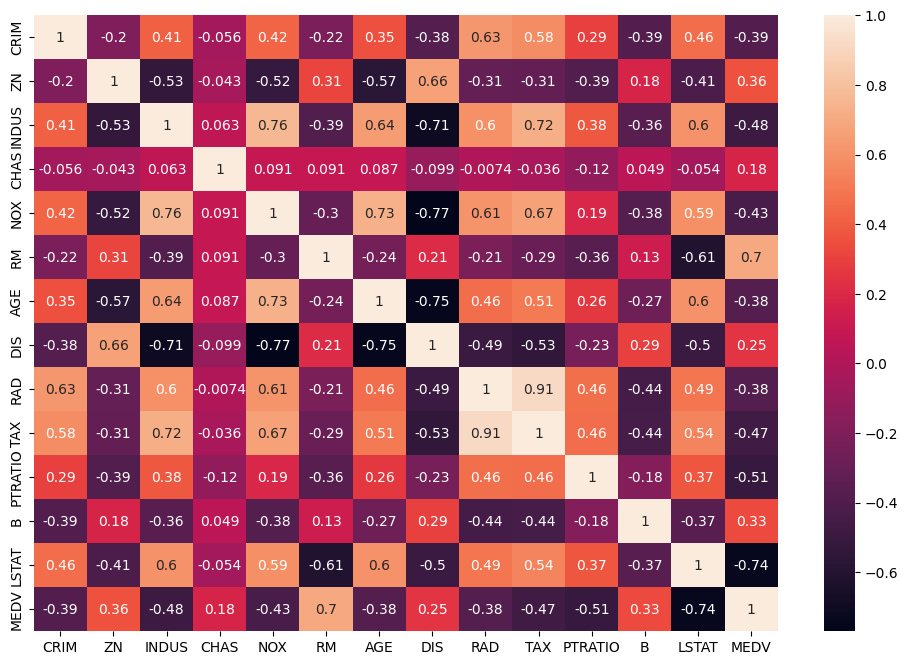

In [ ]:
# entiendimiento: 3.1. correlación visual
# ==============================================================================
plt.figure(figsize=(12, 8))  # Esto configura el tamaño de la grafica
sns.heatmap(df.corr(), annot=True) # Aqui se crea la grafica
plt.show() # Esto muestra la grafica

## Creando modelo con scikit-learn

**Carguemos la libreria que nos va ayudar en nuestra creación de modelos** [sklearn](https://scikit-learn.org/stable/) ⚡

### **¿Qué es normalizar los datos y por qué es importante?**
Normalizar los datos mediante técnicas como "StandardScaler" es un procedimiento en el que se reescalan las características (variables) de modo que tengan una media de 0 y una desviación estándar de 1. Este proceso es especialmente importante en algoritmos de aprendizaje automático que son sensibles a la magnitud de las características. Al normalizar, se consigue que cada característica contribuya de manera equitativa al cálculo de la distancia o el ajuste del modelo, lo que mejora la eficiencia y a menudo la precisión del algoritmo.

Si no se normalizan las variables, una característica con valores altos podría dominar el resultado, lo que podría llevar a resultados engañosos o ineficientes. Por ejemplo, en algoritmos como la regresión lineal, regresión logística, K-means o SVM, si las variables no están en la misma escala, los coeficientes o las métricas de distancia pueden verse sesgados hacia las variables con rangos más grandes.

**¿Cómo funciona $StandardScaler$ o la normalización?**

$$Z = \frac{X-\mu}{\sigma} $$

Donde:

*  $X$ es el valor original de la característica.
* $\mu$ es la media de la característica en el conjunto de datos.
* $\sigma$ es la desviación estándar de la característica en el conjunto de datos.
* $Z$ es el valor normalizado.

**Ejemplo:**

Sabemos que la media de habitaciones es $6.28$ y la desviación estándar es $0.70$, entonces, para un número de habitaciones de $7$ el valor normalizado sera:

$$Z = \frac{7 - 6.28}{0.7}  = 1.028 $$


Ahora, vamos a construir un modelo que nos permita hacer predicciones sobre el valor de las casas en función del número de habitaciones:

$$Y_{precio \ casa} = W_0 + W_1*X_{habitaciones} $$

In [ ]:
from sklearn.preprocessing import StandardScaler #Normalización
from sklearn.linear_model import LinearRegression #Modelo lineal
from sklearn.model_selection import train_test_split #División entre entrenamiento y test
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #Metricas de error

In [ ]:
# División del conjunto de datos en entranmiento y test
# ==============================================================================
X = df['RM'].values.reshape(-1, 1) # Se ajusta el formato para el algoritmo
y = df['MEDV'].values.reshape(-1, 1) # Se ajusta el formato para el algoritmo
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 42)

In [ ]:
# Revisamos el conjunto de entrenamiento
# ==============================================================================
print("Dimensión X train: ", X_train.shape)
print("Dimensión y train: ", y_train.shape)

Dimensión X train:  (404, 1)
Dimensión y train:  (404, 1)


In [ ]:
# Revisamos el conjunto de test
# ==============================================================================
print("Dimensión X test: ", X_test.shape)
print("Dimensión y test: ", y_test.shape)

Dimensión X test:  (102, 1)
Dimensión y test:  (102, 1)


In [ ]:
# Realizamos el proceso de normalización
# ==============================================================================
sc_x = StandardScaler() # Creamos el normalizador para X
sc_y = StandardScaler() # Creamos el normalizador para y

X_train_norm = sc_x.fit_transform(X_train)
y_train_norm = sc_y.fit_transform(y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Mejores parámetros: {'algorithm': 'ball_tree', 'leaf_size': 30, 'n_neighbors': 15, 'p': 1, 'weights': 'uniform'}
Mejor modelo: KNeighborsRegressor(algorithm='ball_tree', n_neighbors=15, p=1)


In [ ]:
# Construimos el modelo
# ==============================================================================
model = grid_search.best_estimator_
result = model.fit(X_train_norm, y_train_norm)

In [ ]:
# Visualizamos el modelo desnormalizado (en datos de test)
# ==============================================================================
X_test_norm = sc_x.transform(X_test)
y_test_norm = sc_y.transform(y_test.reshape(-1, 1))

# Realizar las predicciones con los datos de entrenamiento
y_pred_test_norm = model.predict(X_test_norm)

## Evaluación del modelo


In [ ]:
# Metricas
# ==============================================================================
y_pred_test_norm = model.predict(X_test_norm)
y_pred_train_norm = model.predict(X_train_norm)

X_test_norm = sc_x.transform(X_test)
y_test_norm = sc_y.transform(y_test.reshape(-1, 1))

X_train_norm = sc_x.transform(X_train)
y_train_norm = sc_y.transform(y_train.reshape(-1, 1))

# Calculamos las predicciones
y_pred_test = model.predict(X_test_norm)
y_pred_train = model.predict(X_train_norm)

# Desnormalizamos las predicciones y los valores reales de y para comparar en escala original
y_pred_test = sc_y.inverse_transform(y_pred_test_norm)
y_test_real = sc_y.inverse_transform(y_test_norm)

y_pred_train = sc_y.inverse_transform(y_pred_train_norm)
y_train_real = sc_y.inverse_transform(y_train_norm)

print("METRICAS TRAIN")
print("---------------------------------------------------------------------------------------------------------------------")
mse = mean_squared_error(y_train_real, y_pred_train)
print(f"Error cuadrado medio (MSE): {mse}")
print("---------------------------------------------------------------------------------------------------------------------")
rmse = mean_squared_error(y_train_real, y_pred_train, squared=False)
print(f"Raíz del error cuadrado medio (RMSE): {rmse}")
print("---------------------------------------------------------------------------------------------------------------------")
mae = mean_absolute_error(y_train_real, y_pred_train)
print(f"Error absoluto medio (MAE): {mae}")
print("---------------------------------------------------------------------------------------------------------------------")
r2 = r2_score(y_train_real, y_pred_train)
print(f"Coeficiente de determinación (R²): {r2}")
print("---------------------------------------------------------------------------------------------------------------------")
print("METRICAS TEST")
print("---------------------------------------------------------------------------------------------------------------------")
mse = mean_squared_error(y_test_real, y_pred_test)
print(f"Error cuadrado medio (MSE): {mse}")
print("---------------------------------------------------------------------------------------------------------------------")
rmse = mean_squared_error(y_test_real, y_pred_test, squared=False)
print(f"Raíz del error cuadrado medio (RMSE): {rmse}")
print("---------------------------------------------------------------------------------------------------------------------")
mae = mean_absolute_error(y_test_real, y_pred_test)
print(f"Error absoluto medio (MAE): {mae}")
print("---------------------------------------------------------------------------------------------------------------------")
r2 = r2_score(y_test_real, y_pred_test)
print(f"Coeficiente de determinación (R²): {r2}")


METRICAS TRAIN
---------------------------------------------------------------------------------------------------------------------
Error cuadrado medio (MSE): 34.06518899889989
---------------------------------------------------------------------------------------------------------------------
Raíz del error cuadrado medio (RMSE): 5.836539128533269
---------------------------------------------------------------------------------------------------------------------
Error absoluto medio (MAE): 4.150858085808581
---------------------------------------------------------------------------------------------------------------------
Coeficiente de determinación (R²): 0.6078755119990311
---------------------------------------------------------------------------------------------------------------------
METRICAS TEST
---------------------------------------------------------------------------------------------------------------------
Error cuadrado medio (MSE): 35.897976034858395
--------------

* Error Cuadrado Medio (MSE: 45.975): Esta métrica calcula la media de los errores cuadrados entre los valores reales y los predichos. El MSE da más peso a los errores grandes, lo que significa que los valores atípicos pueden influir significativamente en el resultado. Aunque el MSE por sí solo no es fácilmente interpretable debido a su escala al cuadrado, es útil para comparar diferentes modelos en el mismo conjunto de datos.

$$MSE = \frac{1}{n} \sum (y_{real,i} + y_{pred,i})^2 $$

* Raíz del Error Cuadrado Medio (RMSE: 6.780): El RMSE es la raíz cuadrada del MSE y tiene la ventaja de estar en las mismas unidades que la variable dependiente. En este caso, el RMSE de aproximadamente 6.78 sugiere que, en promedio, las predicciones del modelo difieren del valor real en esta cantidad. Es útil para comparar el rendimiento entre diferentes modelos o para evaluar el mismo modelo en diferentes conjuntos de datos si las unidades de medida son las mismas.

$$RMSE =  \sqrt{MSE} =  \sqrt{\frac{1}{n} \sum (y_{real,i} + y_{pred,i})^2}$$

* Error Absoluto Medio (MAE: 4.476): Este número nos dice que, en promedio, las predicciones se desvían del valor real en 4.476 unidades. A diferencia del MSE y RMSE, el MAE da un trato igual a todos los errores, sin importar su magnitud.

$$MAE = \frac{1}{n} \sum |{y_{real,i} - y_{pred,i}}| $$

* Coeficiente de Determinación (R²: 0.373): Este coeficiente nos informa sobre la cantidad de varianza en la variable dependiente que es explicada por las variables independientes en el modelo. Varía entre 0 y 1, donde 0 indica que el modelo no explica ninguna de la varianza y 1 indica que la explica completamente. En este caso, un R² de aproximadamente 0.373 sugiere que alrededor del 37.3% de la variabilidad en los datos es explicada por el modelo, lo cual podría considerarse bajo dependiendo del contexto específico y el objetivo del análisis.

$$R^2 = 1-\frac{MSE(modelo)}{MSE(modelo \ nulo)} $$